Perceptron

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("D:/研究生/机器学习/INDE-577/ml_project/examples/data/Iris.csv")

# only keep two classes for binary classification
df_binary = df[df['Species'].isin(['Iris-setosa', 'Iris-versicolor'])].copy()

# choose two features for simplicity
X = df_binary[['SepalLengthCm', 'SepalWidthCm']].values
y = (df_binary['Species'] == 'Iris-versicolor').astype(int).values  # {0,1}

print(X.shape, y.shape)


(100, 2) (100,)


In [4]:
from rice_ml.perceptron import Perceptron

clf = Perceptron(max_iter=1000, lr=1.0, random_state=0)
clf.fit(X, y)

y_pred = clf.predict(X)

acc = np.mean(y_pred == y)
acc


1.0

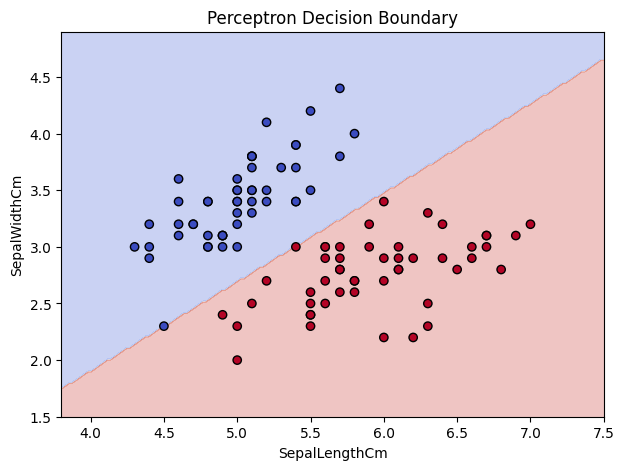

In [5]:
# Visualization of decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.title("Perceptron Decision Boundary")
plt.show()
